<a href="https://colab.research.google.com/github/AnkurGuptaGithub/Signboard-Translation/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        all_feat_cols=range(132)
        self.batch_norm0 = nn.BatchNorm1d(len(all_feat_cols))
        self.dropout0 = nn.Dropout(0.2)

        dropout_rate = 0.2
        hidden_size = 256
        self.dense1 = nn.Linear(len(all_feat_cols), hidden_size)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)
        self.dropout1 = nn.Dropout(dropout_rate)

        self.dense2 = nn.Linear(hidden_size+len(all_feat_cols), hidden_size)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.dense3 = nn.Linear(hidden_size+hidden_size, hidden_size)
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(dropout_rate)

        self.dense4 = nn.Linear(hidden_size+hidden_size, hidden_size)
        self.batch_norm4 = nn.BatchNorm1d(hidden_size)
        self.dropout4 = nn.Dropout(dropout_rate)

        self.dense5 = nn.Linear(hidden_size+hidden_size, 5)

        self.Relu = nn.ReLU(inplace=True)
        self.PReLU = nn.PReLU()
        self.LeakyReLU = nn.LeakyReLU(negative_slope=0.01, inplace=True)
        # self.GeLU = nn.GELU()
        self.RReLU = nn.RReLU()

    def forward(self, x):
        x = self.batch_norm0(x)
        x = self.dropout0(x)

        x1 = self.dense1(x)
        x1 = self.batch_norm1(x1)
        # x = F.relu(x)
        # x = self.PReLU(x)
        x1 = self.LeakyReLU(x1)
        x1 = self.dropout1(x1)

        x = torch.cat([x, x1], 1)

        x2 = self.dense2(x)
        x2 = self.batch_norm2(x2)
        # x = F.relu(x)
        # x = self.PReLU(x)
        x2 = self.LeakyReLU(x2)
        x2 = self.dropout2(x2)

        x = torch.cat([x1, x2], 1)

        x3 = self.dense3(x)
        x3 = self.batch_norm3(x3)
        # x = F.relu(x)
        # x = self.PReLU(x)
        x3 = self.LeakyReLU(x3)
        x3 = self.dropout3(x3)

        x = torch.cat([x2, x3], 1)

        x4 = self.dense4(x)
        x4 = self.batch_norm4(x4)
        # x = F.relu(x)
        # x = self.PReLU(x)
        x4 = self.LeakyReLU(x4)
        x4 = self.dropout4(x4)

        x = torch.cat([x3, x4], 1)

        x = self.dense5(x)

        return x


In [ ]:
model2= Model()

In [ ]:
model2.load_state_dict(torch.load('online_model0.pth'))

<All keys matched successfully>

In [ ]:
model2.state_dict()

OrderedDict([('batch_norm0.weight',
              tensor([0.3505, 0.2582, 0.2861, 0.7069, 0.6943, 0.8224, 0.7258, 0.3879, 0.3686,
                      0.2151, 0.2821, 0.1994, 0.2350, 0.1709, 0.1618, 0.1758, 0.2258, 0.3051,
                      0.2740, 0.2284, 0.2847, 0.1944, 0.1916, 0.1877, 0.1915, 0.1729, 0.2187,
                      0.3581, 0.3429, 0.2424, 0.2832, 0.1931, 0.2151, 0.2158, 0.2227, 0.2216,
                      0.2038, 0.5088, 0.4582, 0.7135, 0.5157, 0.7675, 0.3809, 0.7102, 0.8140,
                      0.7068, 0.2728, 0.3622, 0.3339, 0.3714, 0.3049, 0.4268, 0.2999, 0.2699,
                      0.2436, 0.6277, 0.3075, 0.4627, 0.4614, 0.3585, 0.5168, 0.5107, 0.5007,
                      0.5139, 0.8710, 0.4882, 0.4597, 0.4567, 0.4359, 0.3248, 0.3153, 0.3393,
                      0.3568, 0.1911, 0.2407, 0.1513, 0.1537, 0.6260, 0.3495, 0.1541, 0.2024,
                      0.1205, 0.0990, 0.6080, 0.3746, 0.2756, 0.3235, 0.2402, 0.2249, 0.3929,
                      0.

In [ ]:
# model2.weight
torch.cuda.empty_cache()

In [ ]:
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = MNIST(root='data/', download=True)

In [ ]:
dataset = MNIST(root='data/', train=True, transform= transforms.ToTensor() )

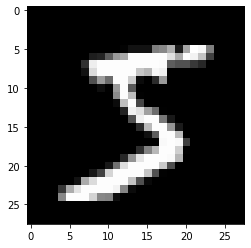

In [ ]:
image, label= dataset[0]
plt.imshow(image.reshape(28,28), cmap='gray')

In [ ]:
train_ds, valid_ds= random_split(dataset, [50000, 10000])

In [ ]:
len(valid_ds)

10000

In [ ]:
train_loader= DataLoader(train_ds, batch_size= 128, shuffle=True)
valid_loader= DataLoader(valid_ds, batch_size= 128)

In [ ]:
model= nn.Linear(28*28, 10)

In [ ]:
model.weight.shape

torch.Size([10, 784])

In [ ]:
input_size=28*28
num_classes=10

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
model= MnistModel()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0290, -0.0213,  0.0100,  ..., -0.0061,  0.0109,  0.0099],
         [ 0.0217, -0.0259, -0.0179,  ..., -0.0297, -0.0054, -0.0094],
         [ 0.0307,  0.0037,  0.0141,  ...,  0.0268, -0.0144, -0.0299],
         ...,
         [ 0.0135, -0.0005, -0.0156,  ...,  0.0219, -0.0227,  0.0009],
         [-0.0056,  0.0209,  0.0290,  ...,  0.0196,  0.0009, -0.0293],
         [-0.0187, -0.0308, -0.0286,  ..., -0.0213, -0.0078,  0.0231]],
        requires_grad=True), Parameter containing:
 tensor([-0.0182,  0.0234, -0.0184,  0.0082,  0.0191,  0.0273,  0.0133,  0.0202,
          0.0199,  0.0145], requires_grad=True)]

In [ ]:
def fit(lr,num_epochs, model, trainloader, val_loader, opt_func=torch.optim.SGD ):
  
  opt_func=torch.optim.SGD
  optimizer = opt_func(model.parameters(), lr)

  record=[]

  for num_epoch in range(num_epochs):
      for batch in train_loader:
        images, label = batch
        out = model(images)
        loss =  F.cross_entropy(out, label)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

      for batch in valid_loader:
        images, labels = batch
        out = model(images)
        loss =  F.cross_entropy(out, labels)
        _ , preds = torch.max(F.softmax(out, dim=1) ,dim=1)
        accuracy = torch.tensor(torch.sum(preds == labels).item() / len(preds))

      record.append(accuracy)
      print('Num of epoch: {}, Loss:{} , Accuracy:{}' .format(num_epoch,loss, accuracy))
  
  return record


In [ ]:
history1 = fit(0.001,50,  model, train_loader, valid_loader)

In [ ]:
torch.stack(history1)

tensor([0.6250, 0.8125, 0.8750, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
        0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
        0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
        0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
        0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
        0.9375, 0.9375, 0.9375, 0.9375, 0.9375])

In [ ]:
accuracy ## Validation

tensor(0.7500)

In [ ]:
dataset2 = MNIST(root='data/', train=False, transform= transforms.ToTensor() )

In [ ]:
test_loader= DataLoader(dataset2, batch_size= 128*2)

In [ ]:
a=[]
for batch in test_loader:
  images, labels = batch
  out = model(images)
  loss =  F.cross_entropy(out, labels)
  _ , preds = torch.max(F.softmax(out, dim=1) ,dim=1)
  accuracy = torch.tensor(torch.sum(preds == labels).item() / len(preds))
  a.append(accuracy)

In [ ]:
test_accuracy = torch.stack(a).mean()
test_accuracy

tensor(0.8833)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.metrics.AUC()
tf.keras.layers.Dense(hidden_layer_size, activation='sw')

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(valid_loader, device)

In [ ]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([7, 2, 4, 1, 5, 7, 3, 7, 6, 5, 3, 6, 7, 4, 2, 4, 5, 4, 6, 6, 6, 1, 9, 4,
        9, 6, 2, 6, 8, 1, 2, 6, 5, 3, 9, 4, 3, 8, 2, 6, 7, 8, 6, 0, 7, 3, 2, 9,
        5, 8, 0, 5, 2, 1, 1, 6, 2, 4, 5, 9, 8, 4, 0, 1, 8, 9, 1, 9, 1, 5, 7, 9,
        6, 9, 8, 1, 1, 9, 0, 6, 0, 4, 3, 7, 9, 4, 3, 5, 0, 3, 9, 6, 0, 2, 9, 5,
        9, 8, 8, 4, 8, 2, 7, 5, 2, 2, 2, 7, 0, 6, 2, 5, 6, 1, 1, 4, 9, 5, 2, 1,
        5, 1, 1, 1, 1, 6, 8, 0], device='cuda:0')
